In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('heart.csv')

In [4]:
data.isnull ().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data_dup = data.duplicated().any()

In [6]:
data = data.drop_duplicates()

In [7]:
data_dup = data.duplicated().any()

In [8]:
data_dup

False

In [9]:
cate_val=[]
cont_val=[]

for column in data.columns:
  if data[column].nunique() <=10:
    cate_val.append(column)
  else:
    cont_val.append(column)

In [10]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [11]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [12]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [13]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [14]:
cate_val.remove('sex')
cate_val.remove('target')
data=pd.get_dummies(data,columns=cate_val,drop_first=True)

In [15]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [16]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [19]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [20]:
X =data.drop('target' ,axis=1)

In [21]:
y = data['target']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=42)

In [24]:
X_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
163,-0.710788,1,-0.433587,0.532247,0.718568,-0.468334,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
291,0.396267,1,-0.205463,0.241930,-0.855851,1.687716,False,False,False,False,...,True,True,False,False,True,False,False,False,False,True
280,-1.042904,0,-0.091401,-0.241930,1.112172,-0.382092,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
85,-1.153610,1,-0.661712,-0.512893,0.893503,-0.899544,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
239,0.839089,0,1.049221,-0.048386,0.193761,0.307844,False,False,False,False,...,True,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.392616,1,-0.661712,-0.183867,-3.436149,-0.037124,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
77,0.949794,1,0.478910,-1.151589,-0.243577,2.550136,False,False,False,False,...,True,False,True,False,True,False,False,False,False,True
125,0.617678,0,1.049221,-0.125804,0.937237,-0.123366,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
522,1.392616,0,1.163283,0.590310,0.980971,-0.899544,False,True,False,False,...,False,False,True,True,False,False,False,False,True,False


In [25]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

In [26]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_pred1 = log.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

In [32]:
from sklearn import svm

In [33]:
svm = svm.SVC()

In [34]:
svm.fit(X_train,y_train)

SVC()

In [35]:
y_pred2 = svm.predict(X_test)

In [36]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier()

In [39]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [40]:
y_pred3=knn.predict(X_test)

In [41]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [42]:
score = []

for k in range (1,40) :
   knn=KNeighborsClassifier(n_neighbors=k)
   knn.fit(X_train,y_train)
   y_pred=knn.predict(X_test)
   score.append(accuracy_score(y_test,y_pred) )

In [43]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [44]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8032786885245902

In [45]:
data = pd.read_csv('heart.csv')

In [46]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [47]:
data = data.drop_duplicates()

In [48]:
data.shape

(302, 14)

In [49]:
X = data.drop('target',axis=1)
y=data['target']

In [50]:
X_train,X_test,y_train,y_test= train_test_split (X,y,test_size=0.2,random_state=42)

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
dt = DecisionTreeClassifier ()

In [53]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
y_pred4= dt.predict(X_test)

In [55]:
accuracy_score(y_test,y_pred4)

0.7213114754098361

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf =RandomForestClassifier()

In [58]:
rf.fit(X_train,y_train,y_train)

RandomForestClassifier()

In [59]:
y_pred5= rf.predict(X_test)

In [60]:
accuracy_score(y_test,y_pred5)

0.47540983606557374

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
gbc = GradientBoostingClassifier ()

In [63]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [64]:
y_pred6 = gbc.predict(X_test)

In [65]:
accuracy_score(y_test,y_pred6)

0.819672131147541

In [66]:
final_data = pd.DataFrame ({'Models': ['LR','SVM','KNN','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test,y_pred1),
                                 accuracy_score(y_test,y_pred2),
                                 accuracy_score(y_test,y_pred3),
                                 accuracy_score(y_test,y_pred4),
                                 accuracy_score(y_test,y_pred5),
                                 accuracy_score(y_test,y_pred6)]})

In [67]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.721311
4,RF,0.475410
5,GB,0.819672


In [68]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

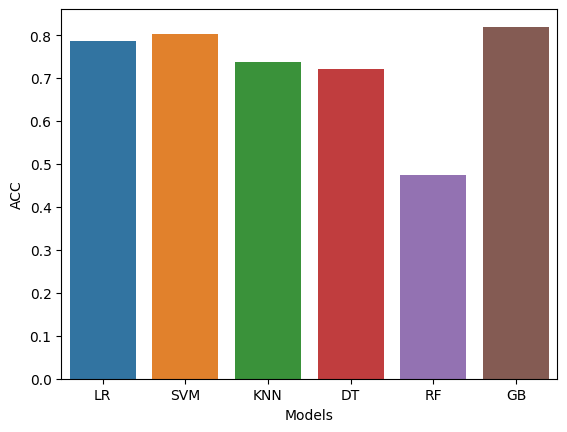

In [69]:
sns.barplot(x='Models', y='ACC', data = final_data)

In [70]:
X=data.drop ('target',axis=1)
y=data['target']

In [71]:
X.shape

(302, 13)

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

In [73]:
gbc = GradientBoostingClassifier ()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [74]:
import pandas as pd

In [75]:
new_data= pd.DataFrame ({
     'age':52,
     'sex':1,
     'cp':0,
     'trestbps':125,
     'chol':212,
     'fbs':0,
     'restecg':1,
     'thalach':168,
     'exang':0,
     'oldpeak':1.0,
     'slope':2,
     'ca':2,
     'thal':3,
     }, index=[0])

In [76]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [77]:
p = gbc.predict(new_data)
if p[0]==0:
   print("No disease")
else:
   print("disease")

No disease


In [78]:
import joblib

In [79]:
joblib.dump(gbc,'model_joblib_heart')

['model_joblib_heart']

In [80]:
model= joblib.load('model_joblib_heart')

In [81]:
model.predict(new_data)

array([0], dtype=int64)

In [82]:
import os
os.system('Xvfb :1 &')
os.environ['DISPLAY'] = ':1'

import joblib
from tkinter import Tk, Label, Entry, Button

In [90]:
import joblib
from tkinter import Tk, Label, Entry, Button

def show_entry_fields():
    try:
        p1 = int(e1.get())
        p2 = int(e2.get())
        p3 = int(e3.get())
        p4 = int(e4.get())
        p5 = int(e5.get())
        p6 = int(e6.get())
        p7 = int(e7.get())
        p8 = int(e8.get())
        p9 = int(e9.get())
        p10 = float(e10.get())
        p11 = int(e11.get())
        p12 = int(e12.get())
        p13 = int(e13.get())
        
        model = joblib.load('model_joblib_heart')
        result = model.predict([[p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13]])
        
        for widget in master.grid_slaves(row=15):
            widget.grid_forget()
        
        if result[0] == 0:
            Label(master, text="No Heart Diseases").grid(row=15, column=0, columnspan=2)
        else:
            Label(master, text="Possibility of Heart Diseases").grid(row=15, column=0, columnspan=2)
    except Exception as e:
        for widget in master.grid_slaves(row=15):
            widget.grid_forget()
        Label(master, text=f"Error: {e}").grid(row=15, column=0, columnspan=2)
        print(f"Error: {e}")

master = Tk()
master.title("Heart Diseases Prediction System")

label_title = Label(master, text="Heart Diseases Prediction System", bg="black", fg="white")
label_title.grid(row=0, column=0, columnspan=2)

labels = [
    "Enter Your Age", "Male or Female [1/0]", "Enter Value of CP", "Enter Value of trestbps",
    "Enter Value of chol", "Enter Value of fbs", "Enter Value of restecg", "Enter Value of thalach",
    "Enter Value of exang", "Enter Value of oldpeak", "Enter Value of slope", "Enter Value of ca",
    "Enter Value of thal"
]

entries = []
for index, text in enumerate(labels, start=1):
    Label(master, text=text).grid(row=index, column=0)
    entry = Entry(master)
    entry.grid(row=index, column=1)
    entries.append(entry)

# Assign the entries to variables e1, e2, ..., e13
e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13 = entries

Button(master, text='Predict', command=show_entry_fields).grid(row=14, column=0, columnspan=2)

master.mainloop()


c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
